# Analyze Work Place Satisfaction Survey Data

This notebook walks through an analysis of work palce satisfaction survey data. The data includes various demographic variables (like age, gender, family and education), as well assalary, sat_management, and more. We'll perform data cleaning, explore descriptive statistics, visualize the data, and examine the relationships between variables using cross-tabulation and hypothesis testing 

## Goals of the analysis:

1. Un
2. Vi
3. Test 
4. fff

In [1]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Exploration

In this section, we load the data and take an initial look at the dataset to understand its structure and contents.

In [4]:
# Pandas uses openpyxl to read Excel files.
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [5]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


## Data Cleaning

Before the analysis, we clean the data. 
1. Drop unnecessary columns.
2. Check for missing values.


In [6]:
df.isnull().sum()

number                     0
gender                     0
age                        0
family                     0
education                  1
years_of_service           2
salary                     0
sat_management             0
sat_colleques              1
sat_workingEnvironment     0
sat_salary                 0
sat_tasks                  0
healtcare                 35
holidayCabin              62
gym                       73
muscleCare                60
dtype: int64

In [7]:
# Drop unnecessary columns (like 'for columns: unmber,healthcare,holidayCabin,gym,muscleCare')
df = df.drop(['number','healtcare','holidayCabin','gym','muscleCare'],axis=1)
df.head()


,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


## Descriptive Statistics and Summary

In [8]:
# Get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               81 non-null     float64
 4   years_of_service        80 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           81 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


In [9]:
# Display basic statistics for numerical columns
df.describe()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
count,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000
mean,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122
std,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502
min,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
# Handling missing values

# education value drop the null row
df = df.dropna(subset=['education'])

# years_of_service values fill with median
df['years_of_service'] = df['years_of_service'].fillna(df['years_of_service'].median())

# sat_colleques fills with majority
df['sat_colleques'] = df['sat_colleques'].fillna(df['sat_colleques'].mode()[0])


In [11]:
# Finding the 3 longest service years respondents based on years_of_service
df.nlargest(n=3, columns='years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
56,1,61,2,2.0,36.0,3119,2,4.0,2,1,5
44,1,55,2,1.0,35.0,2651,4,5.0,4,2,4
45,2,51,2,1.0,28.0,1989,3,3.0,2,2,3


In [12]:
# Finding the 3 shortest service years respondents based on years_of_service
df.nsmallest(n=3, columns='years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
7,1,55,1,1.0,0.0,2066,3,5.0,3,1,3
35,1,31,2,3.0,0.0,1559,2,4.0,3,1,3
61,1,40,2,1.0,0.0,1872,2,3.0,1,2,3


In [13]:
# Finding the 3 oldest respondents based on age
df.nlargest(n=3, columns='age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
56,1,61,2,2.0,36.0,3119,2,4.0,2,1,5
32,1,59,2,3.0,15.0,6278,4,4.0,5,4,4
13,1,58,2,3.0,21.0,3587,4,5.0,4,1,3


In [14]:
# Finding the 3 youngest respondents based on age
df.nsmallest(n=3, columns='age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
58,1,20,1,2.0,1.0,2261,3,4.0,3,2,3
30,1,21,1,3.0,1.0,2340,4,5.0,3,4,2
46,2,22,1,3.0,21.0,1872,3,3.0,4,1,3


## Visualizations

we create some visualizations to better understand the distribution of the data. 

### Investigating Qualitative Variables and Generating Frequency Tables

In [25]:
# Investigate a few qualitative variables and generate frequency table(s) for their values
df1=pd.crosstab(df['education'], 'Count')
# Labeling the index with meaningful education categories
df1.index=['primary school','secondary school graduate','bachelor level','master level']
# Remove the name of the columns
df1.columns.name=''
df1

,Count
primary school,27
secondary school graduate,30
bachelor level,22
master level,2


### Visualizing the Education Distribution

1.we visualize the distribution using a horizontal bar chart. Bar charts are useful for comparing the sizes of different categories visually.

In [18]:
sum(df1['Count'])

81

Text(0.5, 0, 'Count, N = 81')

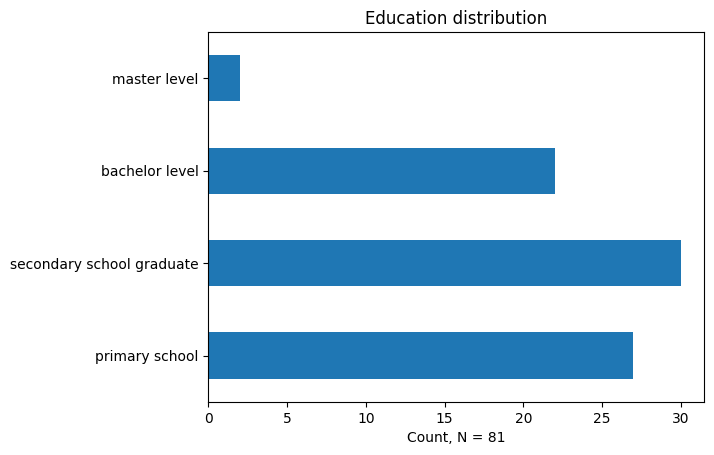

In [19]:
df1.plot.barh(legend = False)
plt.title('Education distribution')
plt.xlabel('Count, N = 81')


2. Visualizing the Education Distribution with Percentages.

In [22]:
df2 = pd.crosstab(df['education'], 'Count')
df2['percentage'] = round(df2['Count'] / df2['Count'].sum() * 100,2)
df2.index=['primary school','secondary school graduate','bachelor level','master level']
df2.columns.name = ''
df2

,Count,percentage
primary school,27,33.33
secondary school graduate,30,37.04
bachelor level,22,27.16
master level,2,2.47


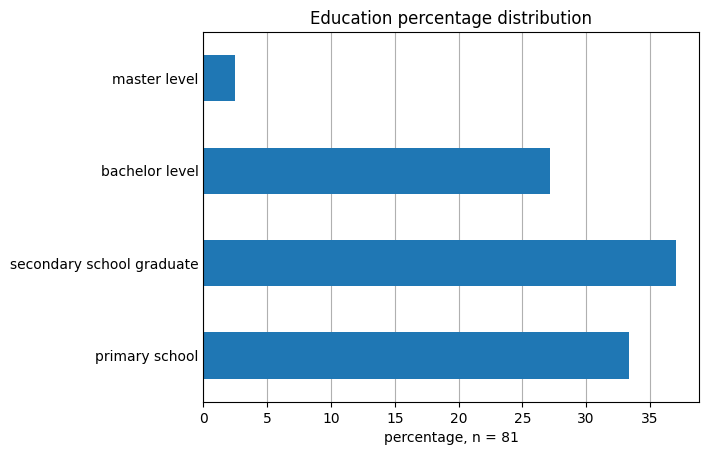

In [24]:
df2['percentage'].plot.barh(zorder = 2)
plt.title('Education percentage distribution')

plt.xlabel('percentage, n = ' + str(df2['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)